In [1]:
import pandas as pd
import zipfile
import os
import geopandas as gpd
from sklearn.metrics import mean_squared_error
import math


## Load SHAPE data

In [3]:
shape_zip_file = zipfile.ZipFile(os.path.join('../output', 'SHAPE-England.zip'))

In [7]:
shape_files = [text_file.filename
               for text_file in shape_zip_file.infolist()
               if text_file.filename.endswith('.csv')]

In [8]:
shape_dfs = [pd.read_csv(shape_zip_file.open(file)) for file in shape_files]
shape_df = pd.concat(shape_dfs)

In [10]:
shape_df

,HID,LADNM,LADCD,OA,LC4402_C_TYPACCOM,LC4402_C_TENHUK11,LC4408_C_AHTHUK11,LC4404_C_SIZHUK11,LC4404_C_ROOMS,LC4405EW_C_BEDROOMS,LC4402_C_CENHEATHUK11,LC4605_C_NSSEC,LC4202_C_ETHHUK11,LC4202_C_CARSNO,FLOOR_AREA,GAS,ACCOM_AGE
0,0.0,St Albans,E07000240,E00120464,3,5.0,3.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0
1,1.0,St Albans,E07000240,E00120356,5,6.0,2.0,4.0,6.0,4.0,2.0,2.0,6.0,1.0,2.0,2.0,1.0
2,2.0,St Albans,E07000240,E00120387,5,3.0,4.0,2.0,6.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0
3,3.0,St Albans,E07000240,E00120294,2,3.0,2.0,4.0,6.0,4.0,2.0,1.0,2.0,3.0,7.0,2.0,7.0
4,4.0,St Albans,E07000240,E00120275,5,5.0,4.0,3.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87750,91533.0,York,E06000014,E00067477,5,5.0,2.0,3.0,4.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,4.0
87751,91534.0,York,E06000014,E00067669,3,3.0,1.0,1.0,4.0,2.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0
87752,91535.0,York,E06000014,E00067571,3,2.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,7.0,2.0,2.0
87753,91536.0,York,E06000014,E00170148,5,6.0,5.0,2.0,3.0,2.0,2.0,9.0,2.0,2.0,2.0,1.0,9.0


## Grouping by OA

In [77]:
total_OA = shape_df['OA'].value_counts().reset_index(name='OA Size')
total_OA

,index,OA Size
0,E00176617,886
1,E00172674,747
2,E00167130,614
3,E00070458,532
4,E00167112,527
...,...,...
171294,E00099887,40
171295,E00172570,40
171296,E00170153,39
171297,E00168744,37


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


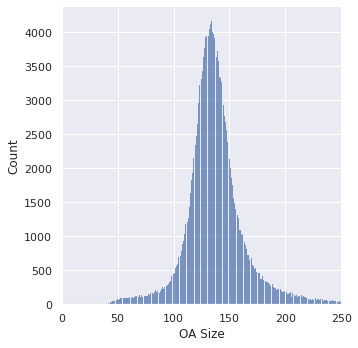

In [120]:
shape_oa_dist = sns.displot(total_OA, x="OA Size")
shape_oa_dist.set(xlim=(0, 250))

In [83]:
headers = list(shape_df.columns.values)
headers.remove('HID')
headers.remove('LADNM')
headers.remove('LADCD')


headers

['OA',
 'LC4402_C_TYPACCOM',
 'LC4402_C_TENHUK11',
 'LC4408_C_AHTHUK11',
 'LC4404_C_SIZHUK11',
 'LC4404_C_ROOMS',
 'LC4405EW_C_BEDROOMS',
 'LC4402_C_CENHEATHUK11',
 'LC4605_C_NSSEC',
 'LC4202_C_ETHHUK11',
 'LC4202_C_CARSNO',
 'FLOOR_AREA',
 'GAS',
 'ACCOM_AGE']

In [88]:
shape_df

,HID,LADNM,LADCD,OA,LC4402_C_TYPACCOM,LC4402_C_TENHUK11,LC4408_C_AHTHUK11,LC4404_C_SIZHUK11,LC4404_C_ROOMS,LC4405EW_C_BEDROOMS,LC4402_C_CENHEATHUK11,LC4605_C_NSSEC,LC4202_C_ETHHUK11,LC4202_C_CARSNO,FLOOR_AREA,GAS,ACCOM_AGE
0,0.0,St Albans,E07000240,E00120464,3,5.0,3.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0
1,1.0,St Albans,E07000240,E00120356,5,6.0,2.0,4.0,6.0,4.0,2.0,2.0,6.0,1.0,2.0,2.0,1.0
2,2.0,St Albans,E07000240,E00120387,5,3.0,4.0,2.0,6.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0
3,3.0,St Albans,E07000240,E00120294,2,3.0,2.0,4.0,6.0,4.0,2.0,1.0,2.0,3.0,7.0,2.0,7.0
4,4.0,St Albans,E07000240,E00120275,5,5.0,4.0,3.0,3.0,1.0,2.0,3.0,5.0,2.0,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87750,91533.0,York,E06000014,E00067477,5,5.0,2.0,3.0,4.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,4.0
87751,91534.0,York,E06000014,E00067669,3,3.0,1.0,1.0,4.0,2.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0
87752,91535.0,York,E06000014,E00067571,3,2.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,7.0,2.0,2.0
87753,91536.0,York,E06000014,E00170148,5,6.0,5.0,2.0,3.0,2.0,2.0,9.0,2.0,2.0,2.0,1.0,9.0


In [112]:
totals = shape_df.groupby(['OA', 'LC4404_C_SIZHUK11']).size().reset_index(name='counts')
# totals

In [113]:
totals

,OA,LC4404_C_SIZHUK11,counts
0,E00000037,1.0,27
1,E00000037,2.0,31
2,E00000037,3.0,31
3,E00000037,4.0,44
4,E00000038,1.0,26
...,...,...,...
684630,E00176773,4.0,6
684631,E00176774,1.0,25
684632,E00176774,2.0,16
684633,E00176774,3.0,8


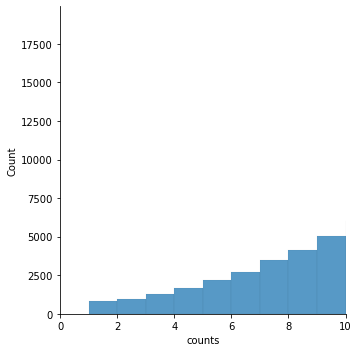

In [118]:
oa_dist = sns.displot(totals, x="counts", binwidth=1)
oa_dist.set(xlim=(0, 10))